In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2024-08-23 17:51:14.481966: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load Data 

In [6]:
fashion_mnist = keras.datasets.fashion_mnist  #load data

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  #split into testing and training

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images[0,23,23]

194

In [9]:
train_images[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [10]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

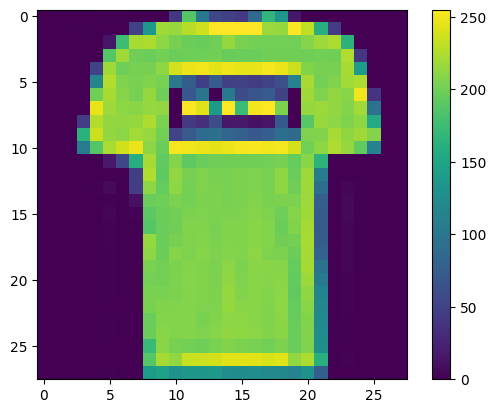

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Building the Model

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

/Users/rayya/.pyenv/versions/3.9.2/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the Model 

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model

In [15]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7839 - loss: 0.6267
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8619 - loss: 0.3800
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8755 - loss: 0.3389
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8867 - loss: 0.3063
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8932 - loss: 0.2906
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8993 - loss: 0.2748
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9016 - loss: 0.2625
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9051 - loss: 0.2519


# Evaluating the Model

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8801 - loss: 0.3447
Test Accuracy: 0.8779000043869019


# Making Predictions

In [17]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [18]:
predictions[0]

array([9.7026450e-06, 1.8018300e-08, 1.1134374e-06, 1.3336480e-09,
       8.0994715e-07, 5.4242625e-03, 3.9280201e-07, 2.6954185e-02,
       8.7739856e-05, 9.6752173e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

# Verifying Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


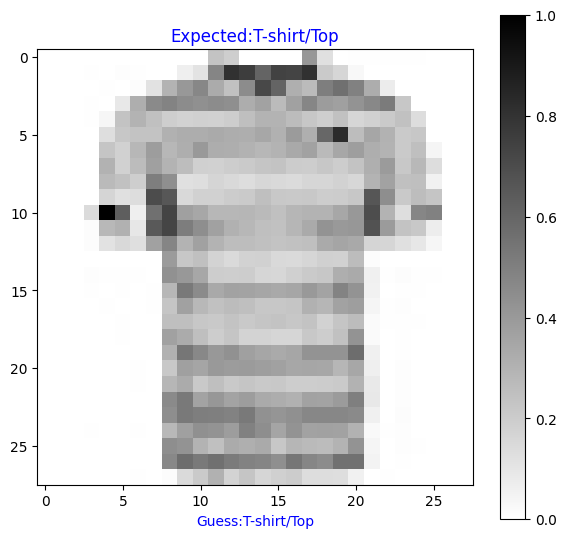

In [39]:
COLOR = 'blue'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected:" + label)
    plt.xlabel("Guess:" + guess)
    plt.tight_layout()
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input('Pick a Number: ')
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
            else:
                print('Try again...')


num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
